In [186]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# 1 Para cada bloco, encontre a probabilidade de um país sorteado aleatoriamente naquele bloco ser da categoria “avançado” (isto é: P(avançado|bloco)).

In [187]:
df = pd.read_csv('aps3/govexpenditure.csv' , skiprows=4, decimal='.', encoding='latin')
df.head()

paises_eu = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden']
paises_otan = ['Albania', 'Algeria', 'Andorra', 'Armenia', 'Azerbaijan', 'Belarus', 'Bosnia and Herzegovina', 'Canada', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macedonia', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'United States']

# Excluindo os países repetidos
for pais in paises_eu:
    if pais in paises_otan:
        paises_otan.remove(pais)

# Criando um DataFrame com os países da OTAN, UE e um total
df_ue = df[df['Country Name'].isin(paises_eu)]
df_otan = df[df['Country Name'].isin(paises_otan)]
df_conjunto = pd.concat([df_ue, df_otan])

# Selecionando os anos indesejados do DataFrame
anos=[]
for ano in range(1960, 2005):
    anos.append(str(ano))


# Excluíndo colunas indesejadas
df_ue = df_ue.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 66'])
df_ue = df_ue.drop(anos, axis=1)
df_ue['media'] = df_ue.mean(axis=1)

df_otan = df_otan.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 66'])
df_otan = df_otan.drop(anos, axis=1)
df_otan['media'] = df_otan.mean(axis=1)
df_otan

df_conjunto = df_conjunto.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 66'])
df_conjunto = df_conjunto.drop(anos, axis=1)
df_conjunto['media'] = df_conjunto.mean(axis=1)

# Calculando a média do conjunto de países da OTAN e UE
media = df_conjunto['media'].mean()
print(media)

filtro_avancados_ue = df_ue['media'] > media                # Filtrar os países da União Europeia que estão acima da média
df_avancados_ue = df_ue[filtro_avancados_ue]

filtro_avancados_otan = df_otan['media'] > media            # Filtrar os países da OTAN que estão acima da média
df_avancados_otan = df_otan[filtro_avancados_otan]

filtro_avancados_total = df_conjunto['media'] > media       # Juntando os dois filtros
df_avancados_total = df_conjunto[filtro_avancados_total]


filtro_avancados_ue = df_ue['media'] > media                # Filtrar os países da União Europeia que estão acima da média
df_avancados_ue = df_ue[filtro_avancados_ue]

filtro_avancados_otan = df_otan['media'] > media            # Filtrar os países da OTAN que estão acima da média
df_avancados_otan = df_otan[filtro_avancados_otan]

filtro_avancados_total = df_conjunto['media'] > media       # Juntando os dois filtros
df_avancados_total = df_conjunto[filtro_avancados_total]


filtro_avancados_ue = df_ue['media'] > media                # Filtrar os países da União Europeia que estão acima da média
df_avancados_ue = df_ue[filtro_avancados_ue]

filtro_avancados_otan = df_otan['media'] > media            # Filtrar os países da OTAN que estão acima da média
df_avancados_otan = df_otan[filtro_avancados_otan]

filtro_avancados_total = df_conjunto['media'] > media       # Juntando os dois filtros
df_avancados_total = df_conjunto[filtro_avancados_total]

P_avancado_ue = len(df_avancados_ue) / len(df_ue)           # Probabilidade de ser avançado dado que é da UE
P_avancado_otan = len(df_avancados_otan) / len(df_otan)     # Probabilidade de ser avançado dado que é da OTAN

print(f'Probabilidade de ser avançado dado que é da UE: {P_avancado_ue * 100:.2f}%')
print(f'Probabilidade de ser avançado dado que é da OTAN: {P_avancado_otan * 100:.2f}%')


P_ue = len(df_ue) / len(df_conjunto)
P_otan = len(df_otan) / len(df_conjunto)
P_avancado = len(df_avancados_total) / len(df_conjunto)

#P(A|B) = P(B|A) * P(A) / P(B)

P_ue_avancado = P_avancado_ue * P_ue / P_avancado           # Probabilidade de ser da UE dado que é avançado
P_otan_avancado = P_avancado_otan * P_otan / P_avancado     # Probabilidade de ser da OTAN dado que é avançado

print(f'Probabilidade de ser da UE dado que é avançado: { P_ue_avancado * 100:.2f}%')
print(f'Probabilidade de ser da OTAN dado que é avançado: { P_otan_avancado * 100:.2f}%')

12.001642776320027
Probabilidade de ser avançado dado que é da UE: 38.46%
Probabilidade de ser avançado dado que é da OTAN: 56.52%
Probabilidade de ser da UE dado que é avançado: 43.48%
Probabilidade de ser da OTAN dado que é avançado: 56.52%


/var/folders/8n/d_gn0k3x4k98s_41gm5jms180000gn/T/ipykernel_16102/2350813062.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_ue['media'] = df_ue.mean(axis=1)
/var/folders/8n/d_gn0k3x4k98s_41gm5jms180000gn/T/ipykernel_16102/2350813062.py:30: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_otan['media'] = df_otan.mean(axis=1)
/var/folders/8n/d_gn0k3x4k98s_41gm5jms180000gn/T/ipykernel_16102/2350813062.py:35: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_conjunto['media'] = df_c

In [188]:
def calcula_probabilidade(lista,indicador):
    contador =0
    for i in range(len(lista)):
        if lista[i] >indicador:

            contador+=1
    return contador/len(lista)



def reamostrar(lista,indicador):
    probabilidades = []
    for i in range(len(lista)):
        amostrai = np.random.choice(lista,size=len(lista),replace=True)
        pi = calcula_probabilidade(amostrai,indicador)
        probabilidades.append(pi)
    return np.percentile(probabilidades,5), np.percentile(probabilidades,95)


In [189]:
# Resolva o exercício aqui
ue = df_ue["media"]
low_ue, high_ue = reamostrar(list(ue), media)
print(low_ue,high_ue)




0.23076923076923078 0.5


In [190]:
# Resolva o exercício aqui
otan = df_otan["media"]
low_otan, high_otan = reamostrar(list(otan), media)
print(low_ue,high_ue)






0.23076923076923078 0.5


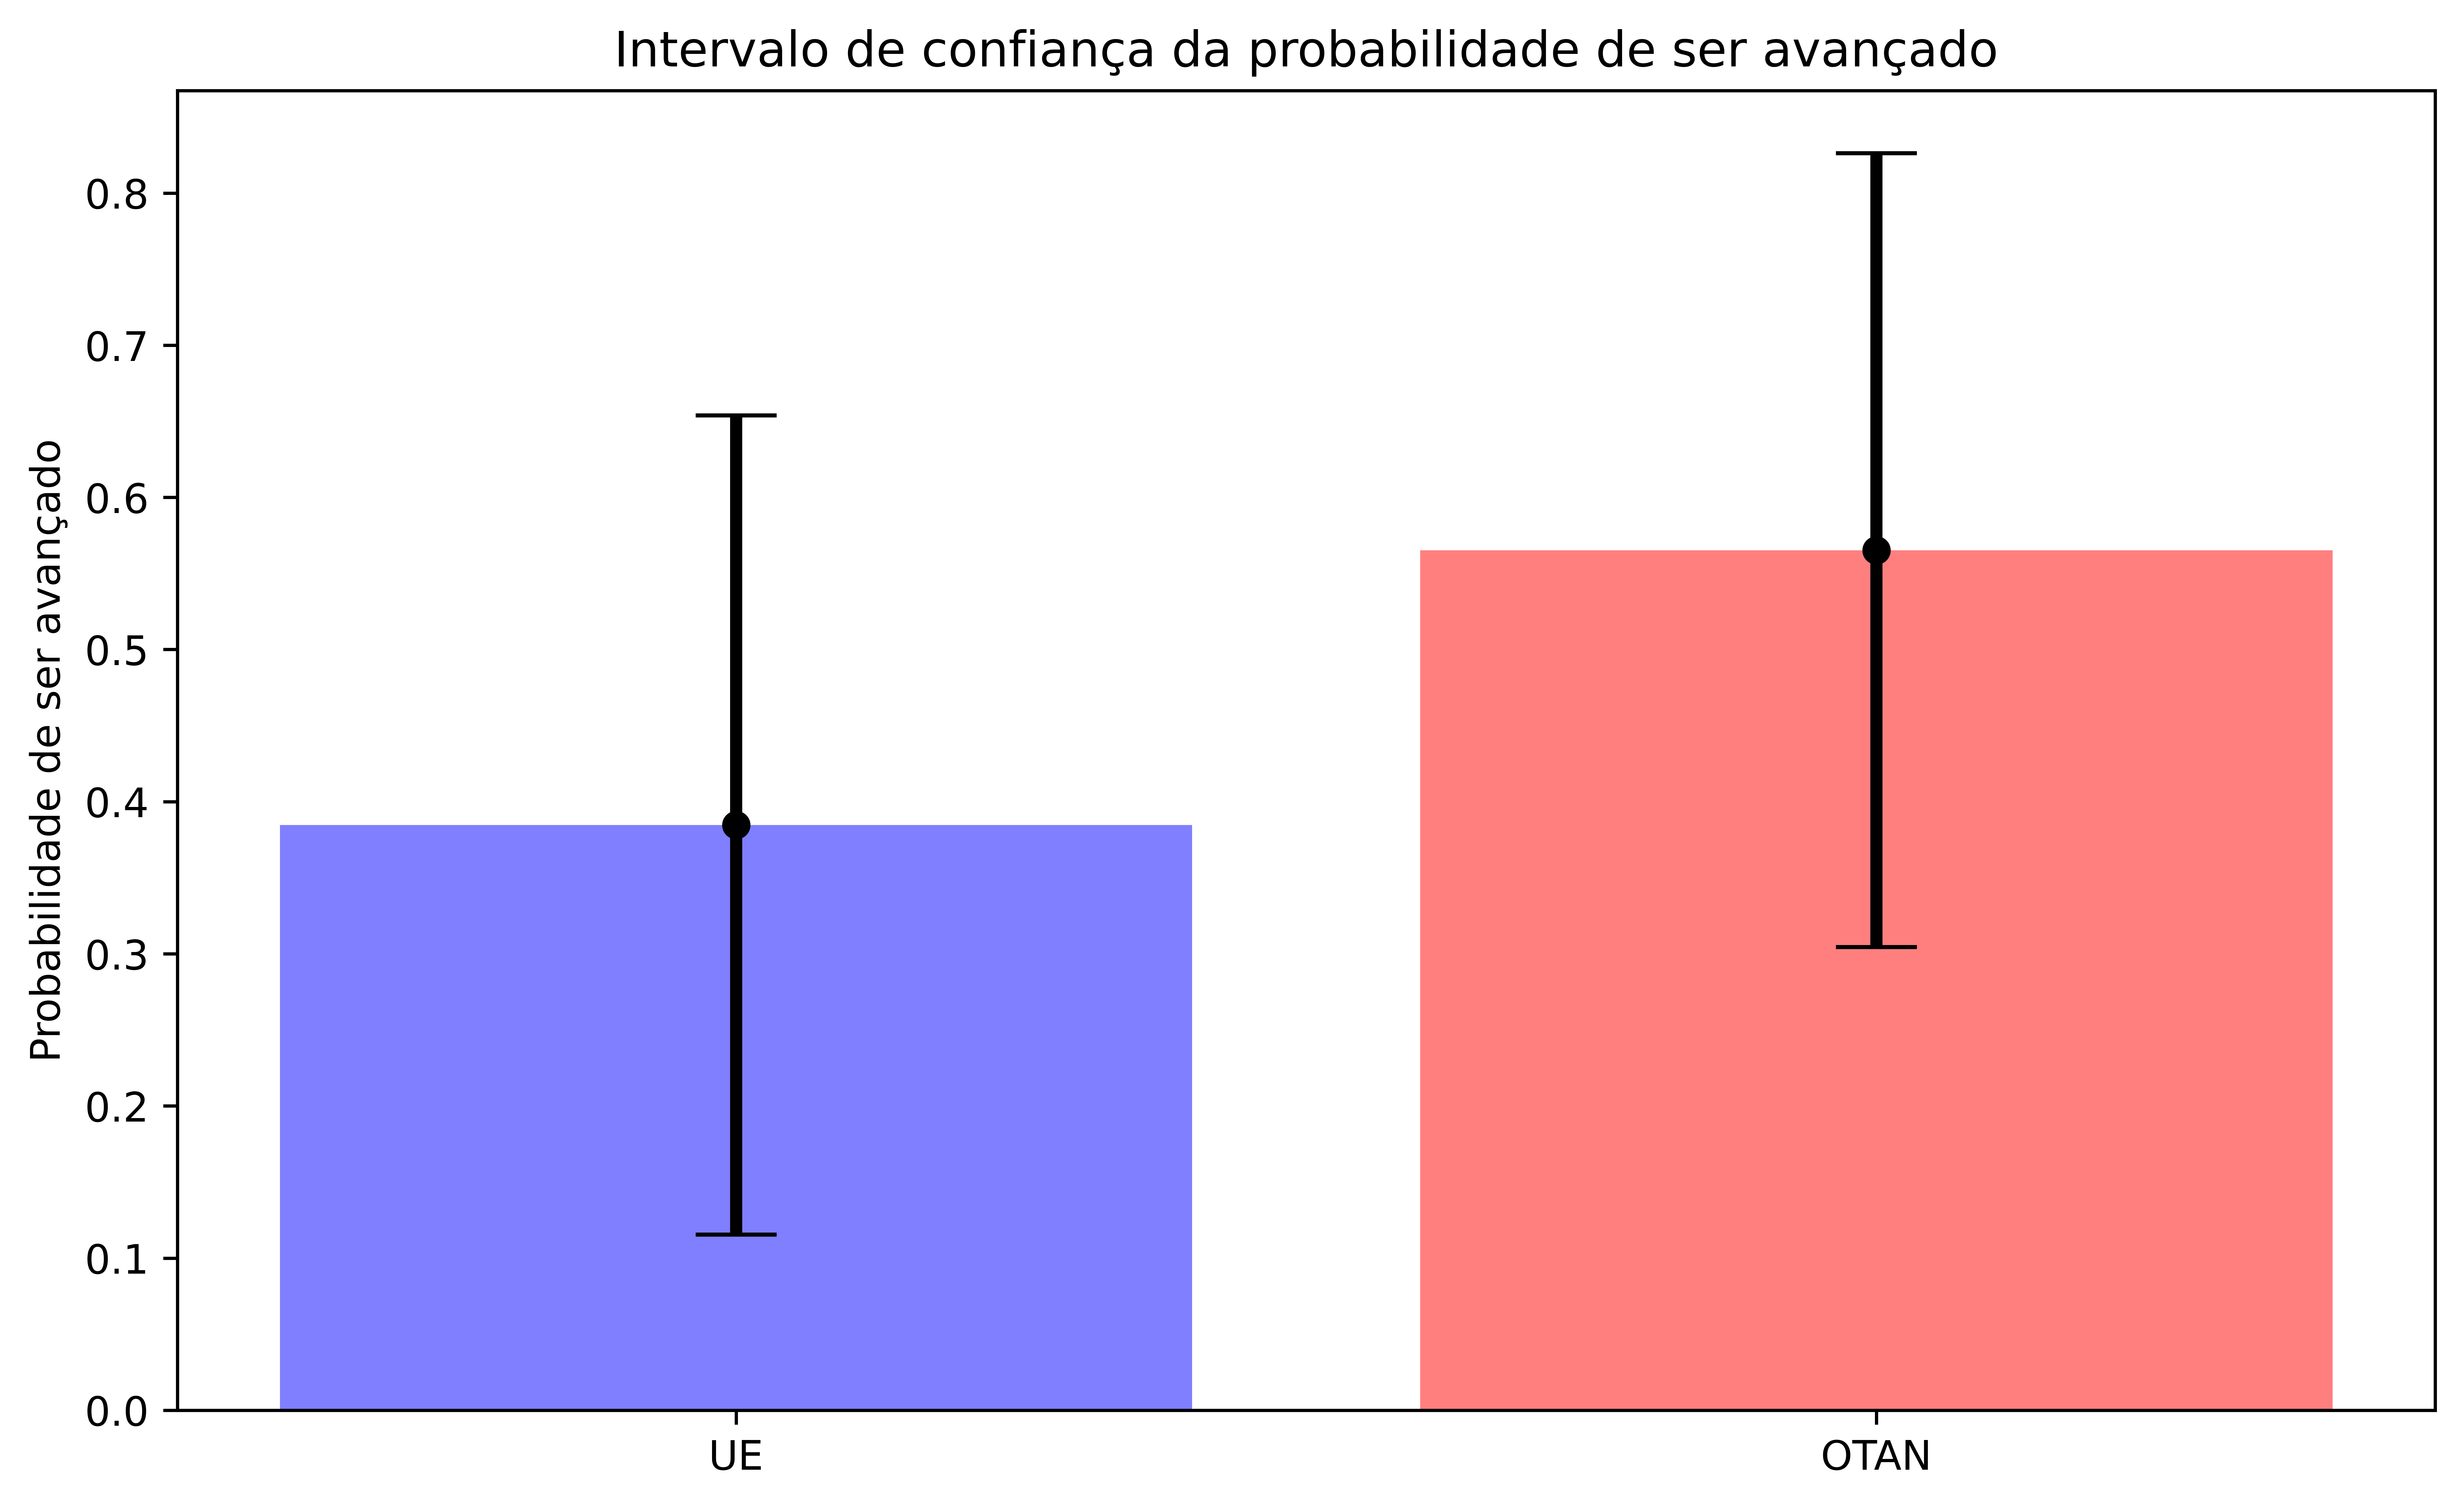

In [191]:
#grafico   
plt.figure(figsize=(10, 6),dpi=1000)
plt.bar(['UE', 'OTAN'], [P_avancado_ue, P_avancado_otan], yerr=[high_ue-low_ue,high_otan-low_otan],capsize=10,color=['blue','red'],alpha=0.5)
plt.errorbar(0, P_avancado_ue, yerr=high_ue-low_ue, fmt='o', color='black', ecolor='black', elinewidth=3, capsize=10)
plt.errorbar(1, P_avancado_otan, yerr=high_otan-low_otan, fmt='o', color='black', ecolor='black', elinewidth=3, capsize=10)
plt.ylabel('Probabilidade de ser avançado')
plt.title('Intervalo de confiança da probabilidade de ser avançado')

plt.show()